In [1]:
from IPython.core.display import display, HTML
display(HTML('<h1>Data Pre-Processing And Analysis</h1>'))


In [2]:
display(HTML('<h2>Imports</h2>'))

In [3]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.feature_selection import mutual_info_classif



# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [5]:
display(HTML('<h2>Load Raw Data</h2>'))

In [6]:
data = pd.read_csv("raw_meta.csv")

In [7]:
data


,Unnamed: 0,value,name,age,benignmalignant,diagnosis,sex,s0,s1,s2,s3,s4,s5,s6
0,342,"{'_id': '5436e3abbae478396759f0cf', 'meta': {'...",ISIC_0000000,55.0,benign,0,female,0,0,0,0,0,0,0
1,293,"{'_id': '5436e3acbae478396759f0d1', 'meta': {'...",ISIC_0000001,30.0,benign,0,female,0,0,0,0,0,0,0
2,345,"{'_id': '5436e3acbae478396759f0d3', 'meta': {'...",ISIC_0000002,60.0,malignant,1,female,1,0,1,1,0,1,1
3,215,"{'_id': '5436e3acbae478396759f0d5', 'meta': {'...",ISIC_0000003,30.0,benign,0,male,0,0,0,0,0,0,0
4,537,"{'_id': '5436e3acbae478396759f0d7', 'meta': {'...",ISIC_0000004,80.0,malignant,1,male,1,0,1,1,0,1,1
5,283,"{'_id': '5436e3acbae478396759f0d9', 'meta': {'...",ISIC_0000005,40.0,benign,0,female,0,0,0,0,0,0,0
6,152,"{'_id': '5436e3acbae478396759f0db', 'meta': {'...",ISIC_0000006,25.0,benign,0,female,0,0,0,0,0,0,0
7,288,"{'_id': '5436e3acbae478396759f0dd', 'meta': {'...",ISIC_0000007,25.0,benign,0,female,0,0,0,0,0,0,0
8,498,"{'_id': '5436e3acbae478396759f0df', 'meta': {'...",ISIC_0000008,30.0,benign,0,female,0,0,0,0,0,0,0
9,7,"{'_id': '5436e3acbae478396759f0e1', 'meta': {'...",ISIC_0000009,30.0,benign,0,female,0,0,0,0,0,0,0


In [8]:
display(HTML('<h2>Drop Columns</h2>'))

In [9]:
data = data.drop(['Unnamed: 0','value', 'benignmalignant'], axis = 1)

In [10]:
display(HTML('<h2>Convert Text To Numeric</h2>'))

In [11]:
data['sex']= data['sex'].map({'female':1, 'male': 0})

In [12]:
display(HTML('<h2>Missing Value Analysis</h2>'))


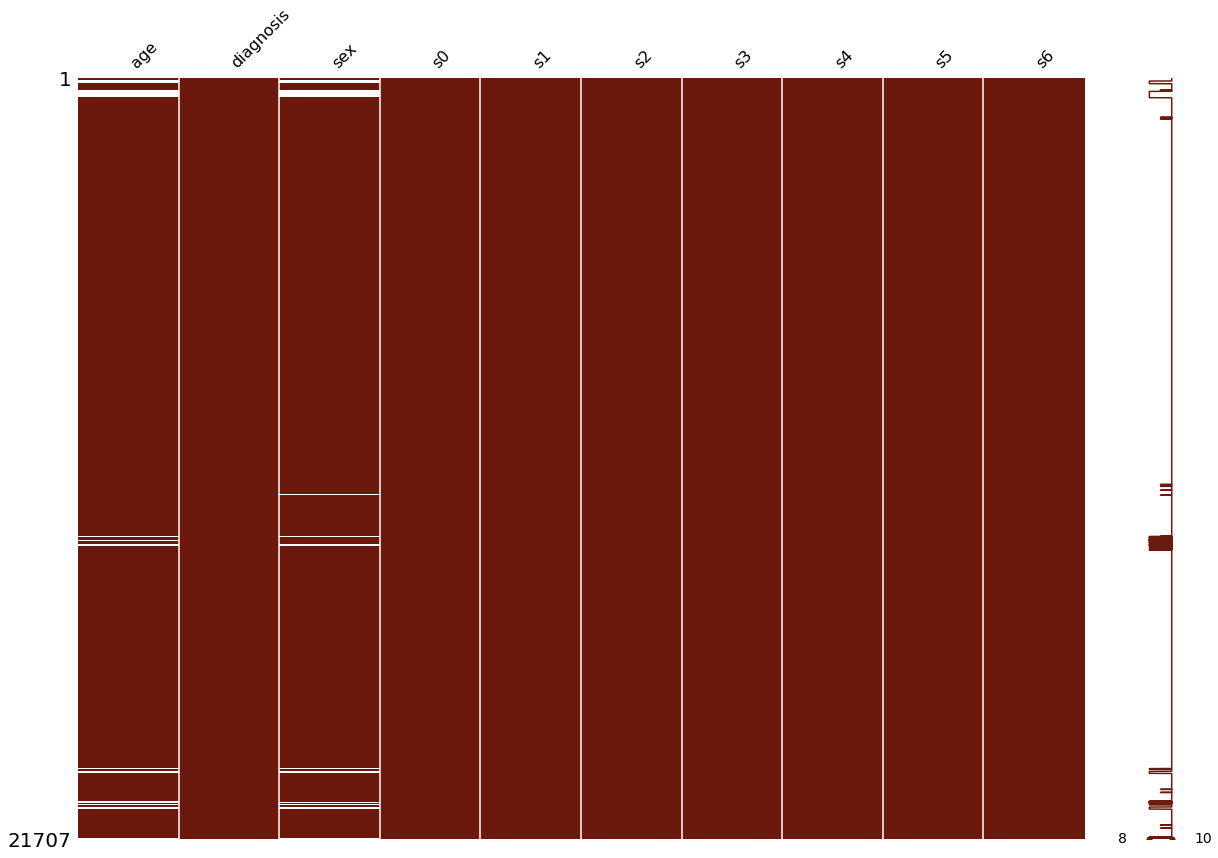

In [13]:
import missingno as msno
# Nullity or missing values by columns
display(HTML('<h3>Before :</h3>'))
msno.matrix(df=data.iloc[:,1:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))


In [14]:
display(HTML('<h3>Missing Sex Values</h3>'))

In [15]:
def missing_values_sex(data):
    fill_na_values = 0
    #Calculate max in a disease
    for diagnosis in data['diagnosis'].unique():
        female_count = data[data['diagnosis'] == diagnosis].groupby('sex').count()['name'][1]
        male_count = data[data['diagnosis'] == diagnosis].groupby('sex').count()['name'][0]
        
        if(female_count > male_count):
            fill_na_values = 1
        else:
            fill_na_values = 0
    
        data['sex'].fillna(fill_na_values, inplace = True)

    
missing_values_sex(data)

In [16]:
display(HTML('<h3>Missing Age Values</h3>'))

In [17]:
def fill_missing_age(data):
    
    median_list = data.groupby('diagnosis').median()['age']
    x = data[data['diagnosis'] == 0]
    x1 = data[data['diagnosis'] == 1]
    x2 = data[data['diagnosis'] == 2]
    x3 = data[data['diagnosis'] == 3]
    x4 = data[data['diagnosis'] == 4]
    x5 = data[data['diagnosis'] == 5]
    x['age'].fillna(median_list[0], inplace = True)
    x1['age'].fillna(median_list[1], inplace = True)
    x2['age'].fillna(median_list[2], inplace = True)
    x3['age'].fillna(median_list[3], inplace = True)
    x4['age'].fillna(median_list[4], inplace = True)
    x5['age'].fillna(median_list[5], inplace = True)

    data = pd.concat([x,x1,x2,x3,x4,x5])
    
    return data
       

    


In [18]:
display(HTML('<h3>Main Thread Missing</h3>'))

In [19]:
def main_fill_function(data):
    missing_values_sex(data)
    data = fill_missing_age(data)
    return data

In [20]:
data = main_fill_function(data)

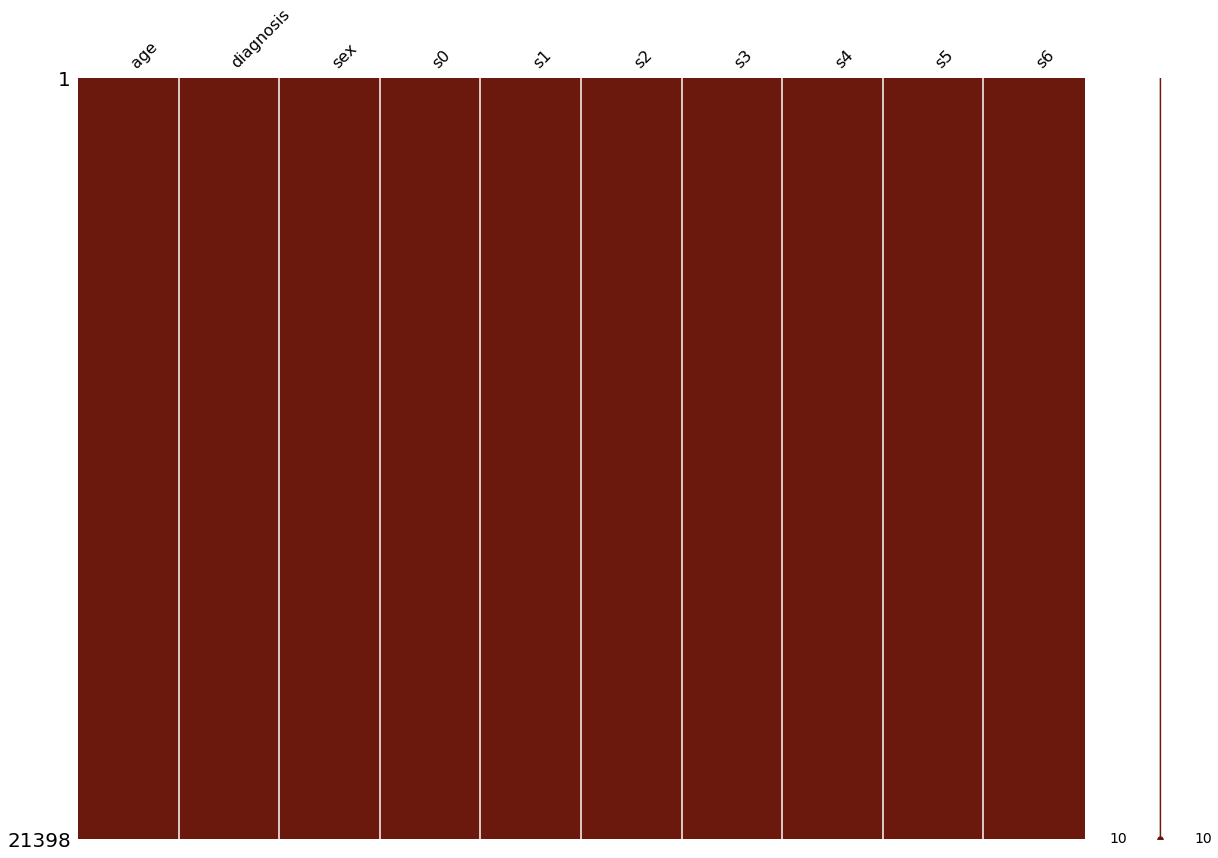

In [21]:
import missingno as msno
# Nullity or missing values by columns
display(HTML('<h3>After :</h3>'))
msno.matrix(df=data.iloc[:,1:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [22]:
display(HTML('<h2>Convert Continuous To Discreet</h2>'))

In [23]:
def bucket_age(age):
    if 20 > age >= 0:
        return 0
    elif 40 > age >= 20:
        return 1
    elif 60 > age >= 40:
        return 2
    elif 80 > age >= 60:
        return 3
    elif 150 > age >= 80:
        return 4

In [24]:
data['age'] = data['age'].apply(lambda age : bucket_age(age))

In [25]:
display(HTML('<h2>Plot Target Label</h2>'))

In [26]:
data2 = [go.Bar(
            x = data["diagnosis"].value_counts().index.values,
            y = data["diagnosis"].value_counts().values,
            text='Distribution of target variable'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data =data2, layout=layout)

py.iplot(fig, filename='basic-bar')

In [27]:
display(HTML('<h2>Plot Correlation</h2>'))

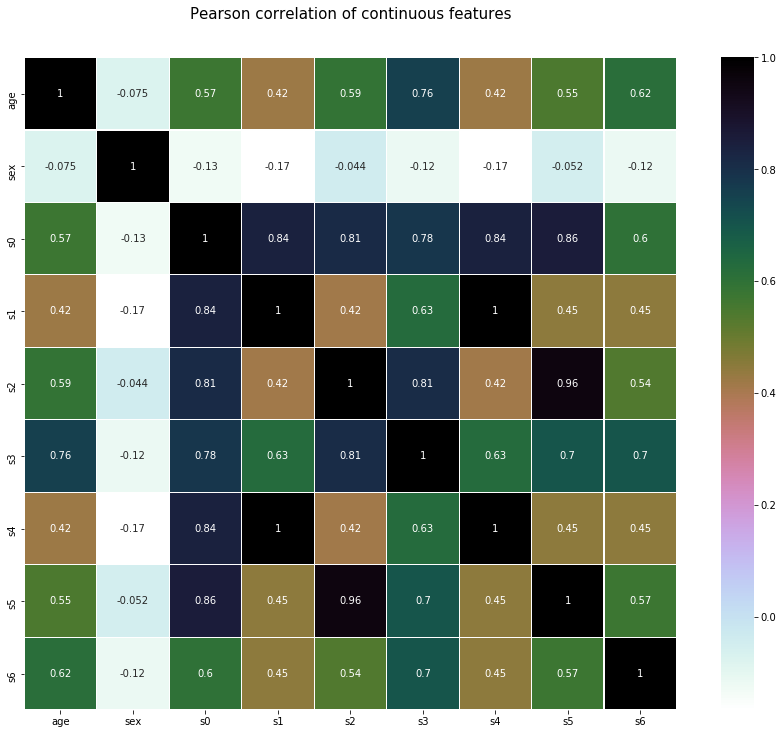

In [28]:
colormap = plt.cm.cubehelix_r
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(data.drop('diagnosis',axis = 1).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [29]:
display(HTML('<h2>Plot Variable Count</h2>'))

In [30]:
bin_col = [col for col in data.drop(['name','diagnosis','age'], axis = 1).columns]
zero_list = []
one_list = []
two_list = []
for col in bin_col:
    zero_list.append((data[col]==0).sum())
    one_list.append((data[col]==1).sum())
    two_list.append((data[col]==2).sum())

In [31]:
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)
trace3 = go.Bar(
    x=bin_col,
    y=two_list,
    name='Two count'
)



data2 = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 2 and 0 in binary variables'
)

fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='stacked-bar')


In [32]:
display(HTML('<h2>Plot Extended Corelation</h2>'))

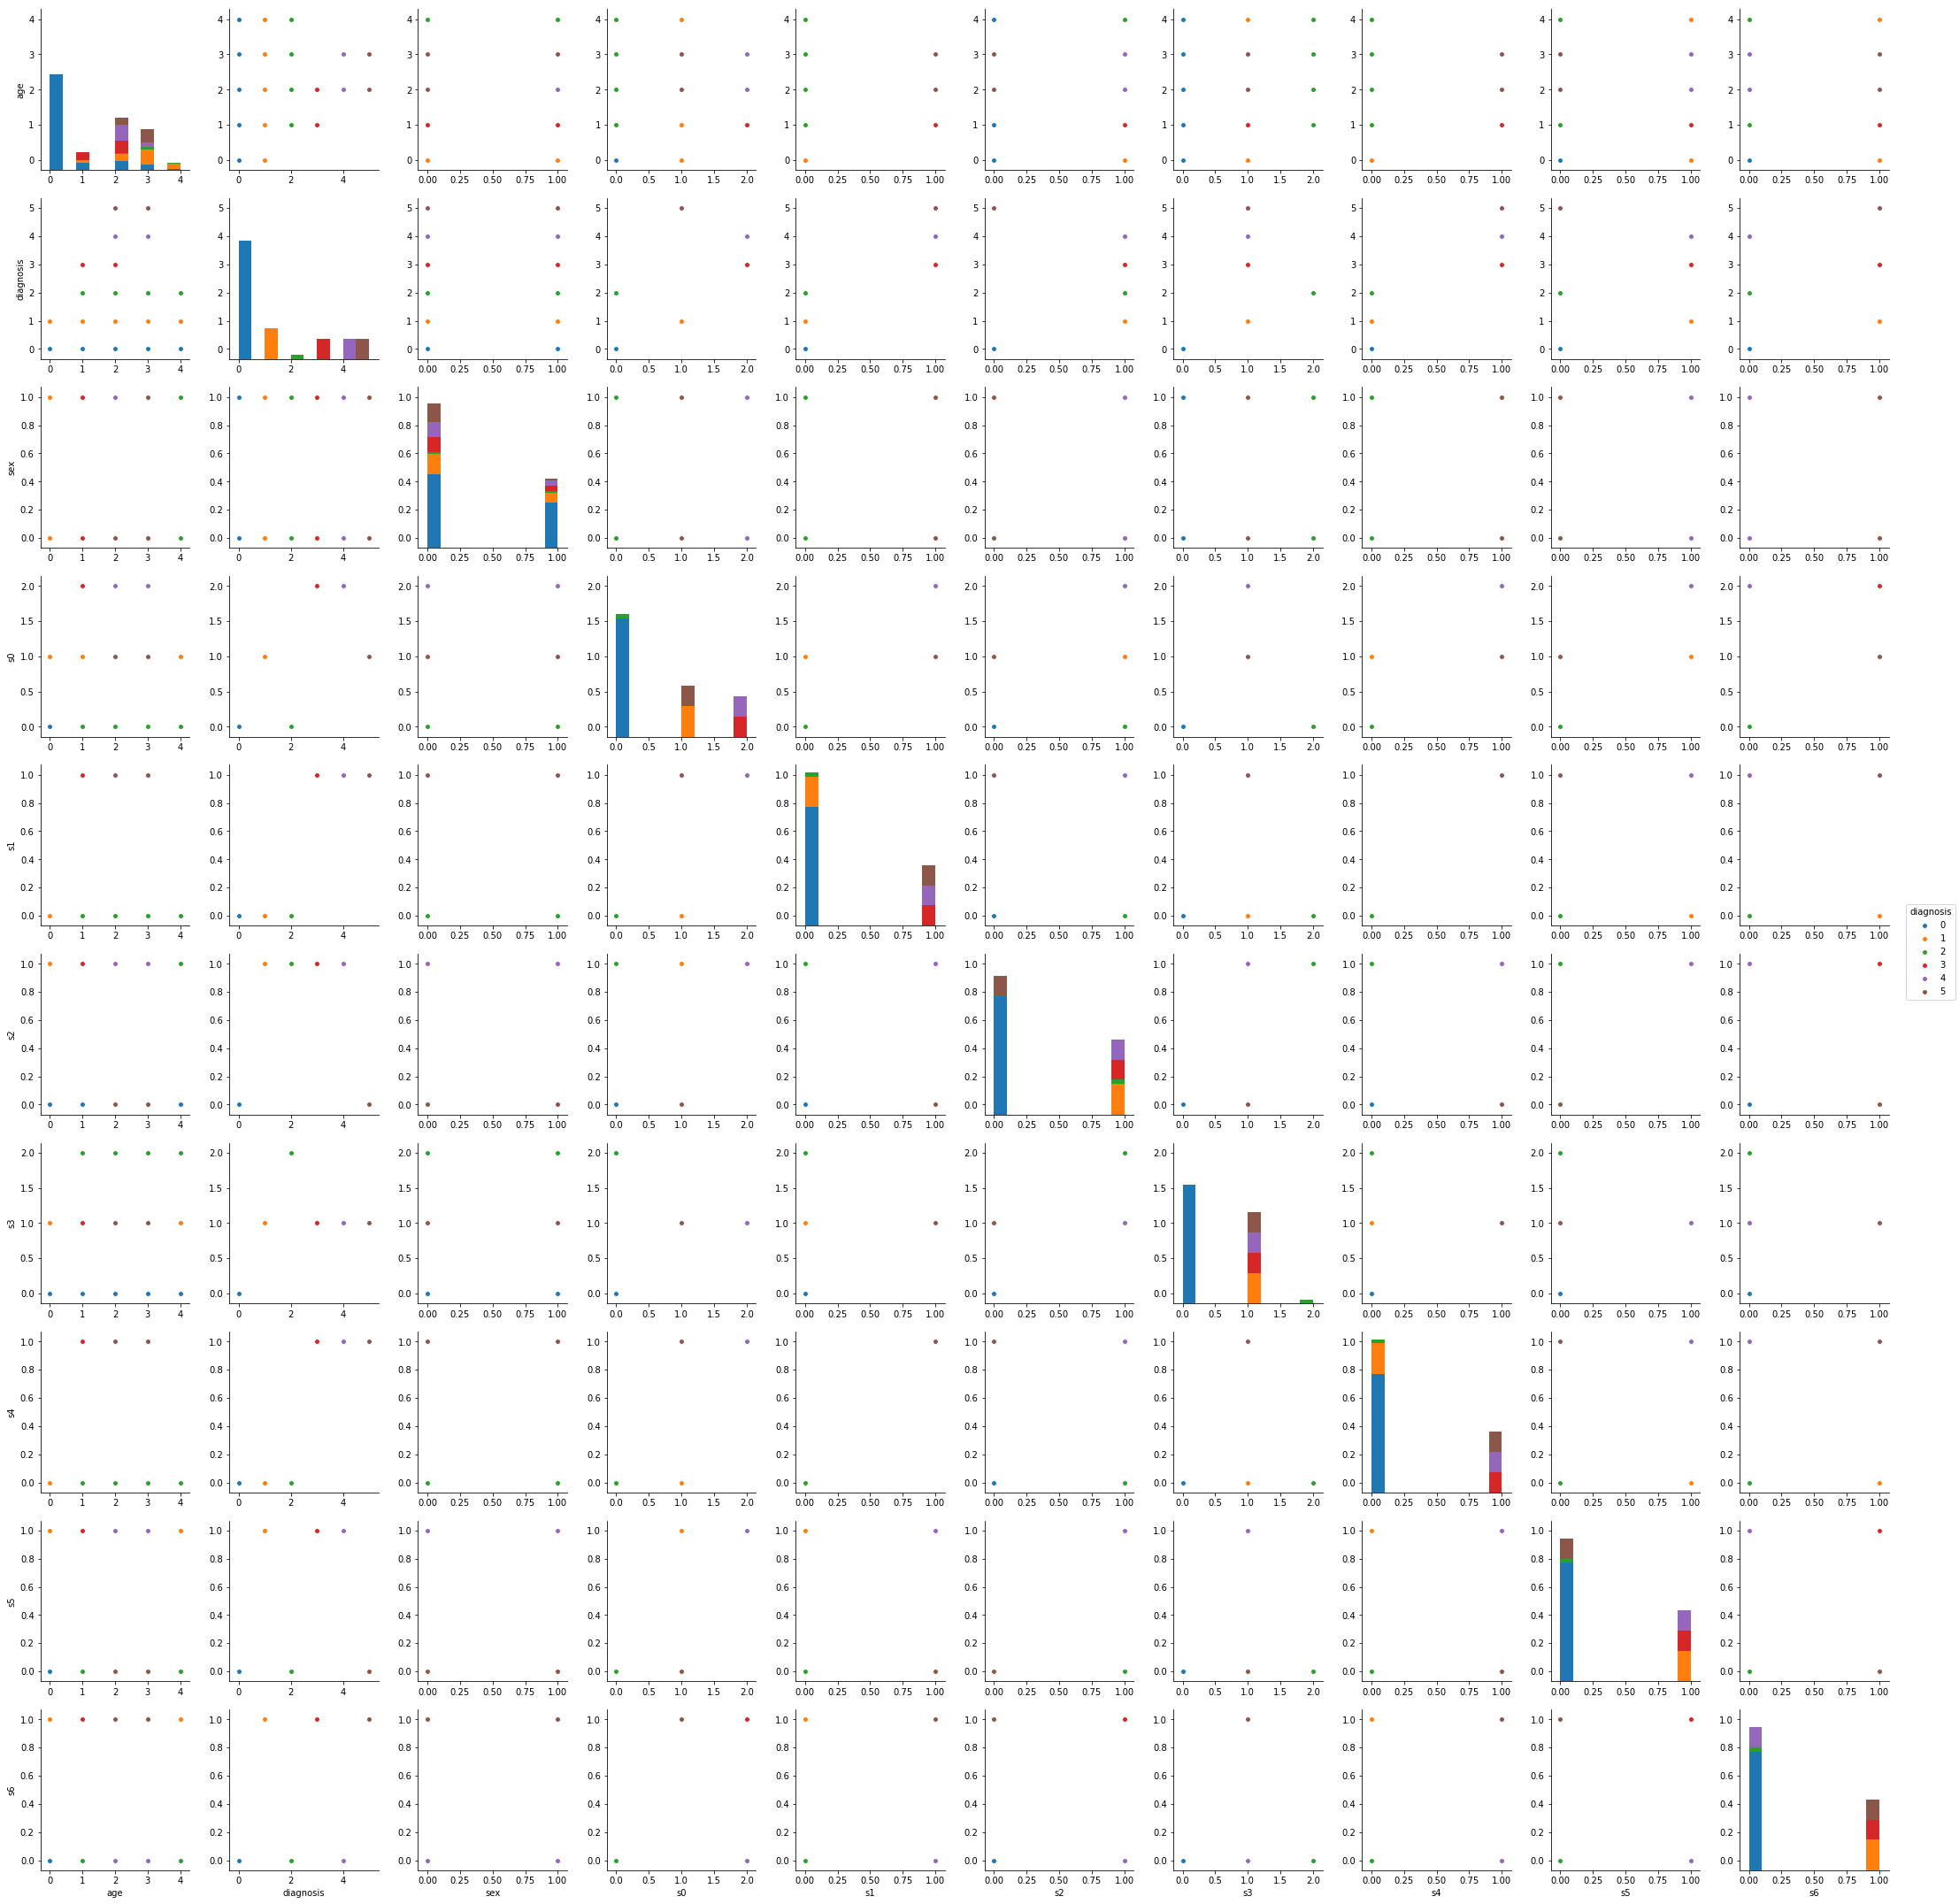

In [33]:
sns.pairplot(data.drop(['name'], axis=1), hue="diagnosis", size=3)

In [34]:
display(HTML('<h2>Random Forest Feature Importance</h2>'))

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(data.drop(['name', 'diagnosis'],axis=1), data.diagnosis)
features = data.drop(['name', 'diagnosis'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


In [36]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data2 = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data2, layout=layout)
py.iplot(fig,filename='scatter2010')

In [37]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')